In [ ]:
!pip install qiskit
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=6c84450571032b7520477586149c04d3bea112c94833ee0afc58340f2f729150
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━

# Intermediate Challenge
At this point we assume that you have already completed the beginner track (labs A-C) and are comfortable with basic gates like CX, CNOT, and H. In this challenge we hope to motivate **quantum teleportation** and **The Hadamard Test**

In [ ]:
from google.colab import files
from IPython.display import Image

# uploaded = files.upload()

Image('superdense.jpg', height = 400, width = 800)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

## Part 1. Superdense Coding




We will break the problem into 3 parts: creating the bell pair, Alice encoding the message, and Bob decoding the message

In [ ]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram

### Creating a bell pair

In [ ]:
def create_bell_pair():
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc = QuantumCircuit(2)
    # START YOUR CODE HERE


    # END YOUR CODE
    return qc

### Encoding Alice Message


Encoding truth table

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$

| Intended Message | Applied Gate | Resulting State|
|-----|----|----|
| 00 | $\operatorname{I}$ | $\ket{00} + \ket{11}$ |
| 01 | $\operatorname{X}$ | $\ket{10} + \ket{01}$ |
|10 | $\operatorname{Z}$ | $\ket{00} - \ket{11}$
|11 | $\operatorname{ZX}$ | $-\ket{10} + \ket{10}$|




In [ ]:
def encode_message(qc, qubit, msg):
    """
    Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    """
    # START YOUR CODE HERE


    # END YOUR CODE

    return qc

### Decoding Bob State

In [ ]:
def decode_message(qc):
    """
    Decodes the message using the decoding protocol
    Agrs:
      qc (QuantumCircuit): Circuit to be decoded
    """
    # START YOUR CODE HERE


    # END YOUR CODE
    return qc

### Put it all together

In [ ]:
# Charlie creates the entangled pair between Alice and Bob
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '10' # CHANGE THE MESSAGE AS YOU SEE FIT
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After receiving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw()

░  ░  ░ ┌─┐   
   q_0: ─░──░──░─┤M├───
         ░  ░  ░ └╥┘┌─┐
   q_1: ─░──░──░──╫─┤M├
         ░  ░  ░  ║ └╥┘
meas: 2/══════════╩══╩═
                  0  1

### Visualizing Our Measurements

{'00': 1024}


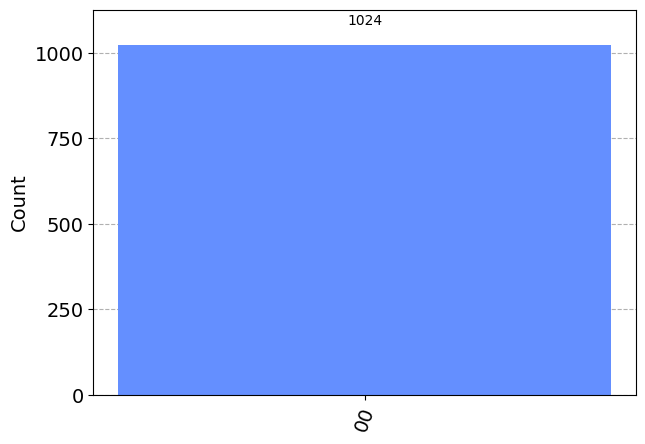

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

As we expect we only see the correct message with no errors


## Part 2. Quantum Teleportation


### Create Bell Pair


We must modify our previous bell state generator code to allow us to create Bell pairs on any two qubits in our circuit


In [ ]:
def create_bell_pair(qc, a, b):
    """
    Creates a bell pair in qc using qubits a & b
    args:
        qc (Quantum Circuit): quantum circuit to apply bell pair to
        a (int): first entangled qubit
        b (int): second entangled qubit
    """
    # START YOUR CODE HERE

    # END YOUR CODE HERE

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)
# And view the circuit so far:
teleportation_circuit.draw()

q_0: 
       
  q_1: 
       
  q_2: 
       
crz: 1/
       
crx: 1/

### Alice Gates


In [ ]:
def alice_gates(qc, psi, a):
    """
    Applies the Alice gates on qc
    args:
        qc (Quantum Circuit): quantum circuit to apply the Alice gates to
        psi (int): the qubit we are trying to send to Bob
        a (int): where we should apply our controlled gate
    """
    # START YOUR CODE HERE

    # END YOUR CODE HERE

In [ ]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier() # Use barrier to separate steps

## STEP 2
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

░ 
  q_0: ─░─
        ░ 
  q_1: ─░─
        ░ 
  q_2: ─░─
        ░ 
crz: 1/═══
          
crx: 1/═══

### Measure and send

In [ ]:
def measure_and_send(qc, a, b):
    """
    Measures qubits a & b and 'sends' the results to Bob
    args:
        qc (Quantum Circuit): quantum circuit to measure
        a (int): the qubit to assign to classical register 0
        b (int): the qubit to assign to classical register 1
    """
    # START YOUR CODE HERE

    # END YOUR CODE HERE

In [ ]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier() # Use barrier to separate steps

## STEP 2
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.barrier()

## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw()

░  ░ 
  q_0: ─░──░─
        ░  ░ 
  q_1: ─░──░─
        ░  ░ 
  q_2: ─░──░─
        ░  ░ 
crz: 1/══════
             
crx: 1/══════

### Apply Bob gate
Remeber the truth table for Bob gates is the same as for superdense coding:
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$

| Intended Message | Applied Gate | Resulting State|
|-----|----|----|
| 00 | $\operatorname{I}$ | $\ket{00} + \ket{11}$ |
| 01 | $\operatorname{X}$ | $\ket{10} + \ket{01}$ |
|10 | $\operatorname{Z}$ | $\ket{00} - \ket{11}$
|11 | $\operatorname{ZX}$ | $-\ket{10} + \ket{10}$|

In [ ]:
def bob_gates(qc, qubit, crz, crx):
    """
    This function takes a QuantumCircuit (qc), integer (qubit) and
    ClassicalRegisters (crz & crx) to decide which gates to apply
    args:
    """
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit

    # START YOUR CODE HERE

    # END YOUR CODE HERE

In [ ]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier() # Use barrier to separate steps

## STEP 2
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.barrier()

## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.barrier()

## STEP 4
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw()


░  ░  ░ 
  q_0: ─░──░──░─
        ░  ░  ░ 
  q_1: ─░──░──░─
        ░  ░  ░ 
  q_2: ─░──░──░─
        ░  ░  ░ 
crz: 1/═════════
                
crx: 1/═════════

### Testing the circuit


<IPython.core.display.Latex object>

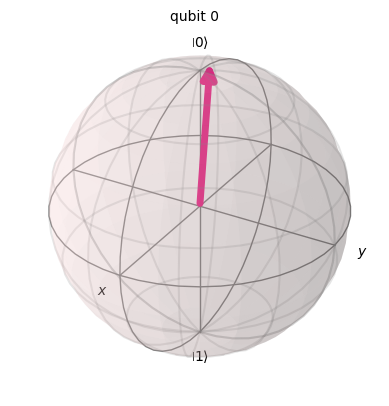

In [ ]:
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

Initialize our psi

In [ ]:
from qiskit.extensions import Initialize

init_gate = Initialize(psi)
init_gate.label = "init"

Run the code

In [ ]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)
qc.barrier()

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)
qc.barrier()

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw()

┌──────────────────────────────────────────┐ ░  ░  ░  ░ 
  q_0: ┤ init(0.90545+0.24567j,-0.26906-0.21776j) ├─░──░──░──░─
       └──────────────────────────────────────────┘ ░  ░  ░  ░ 
  q_1: ─────────────────────────────────────────────░──░──░──░─
                                                    ░  ░  ░  ░ 
  q_2: ─────────────────────────────────────────────░──░──░──░─
                                                    ░  ░  ░  ░ 
crz: 1/════════════════════════════════════════════════════════
                                                               
crx: 1/════════════════════════════════════════════════════════

## Part 3. The Hadamard Test


### What is the Hadamard test

All quantum logic gates are said to be both **Hermitian** and **Unitary**. For the Hadamard test we will exploit the fact that they are unitary to estimate the real and imaginary components of the expectated value of any quantum logic gate $U$ acting on a state $\ket{\psi}$.

(Note: Unitary means that $U^*U = UU^* = I$ )